# Visualizaciones de K-Fold Cross-Validation

Este notebook genera visualizaciones de los resultados de 10-Fold Cross-Validation.

**Visualizaciones incluidas:**
1. Métricas por fold (barplot)
2. Distribución de errores (boxplot)
3. Comparación con split simple
4. Resumen de estadísticas
5. Convergencia del error (line plot)
6. Tabla resumen para LaTeX

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:

df_kfold = pd.read_csv('kfold_cv_detailed_results.csv')
with open('kfold_cv_summary.json', 'r') as f:
    kfold_summary = json.load(f)

try:
    with open('all_biomarkers_results.json', 'r') as f:
        simple_split = json.load(f)
    has_comparison = True
except:
    has_comparison = False
    print("⚠️ all_biomarkers_results.json no encontrado. Se omitirá la comparación.")

print(f"\n✅ Cargados {len(df_kfold)} folds de K-Fold CV")
print(f"\nResumen rápido:")
print(f"  MAE: {kfold_summary['mae_mean']:.3f} ± {kfold_summary['mae_ci']:.3f} años")
print(f"  RMSE: {kfold_summary['rmse_mean']:.3f} ± {kfold_summary['rmse_ci']:.3f} años")


✅ Cargados 10 folds de K-Fold CV

Resumen rápido:
  MAE: 0.083 ± 0.030 años
  RMSE: 0.132 ± 0.065 años


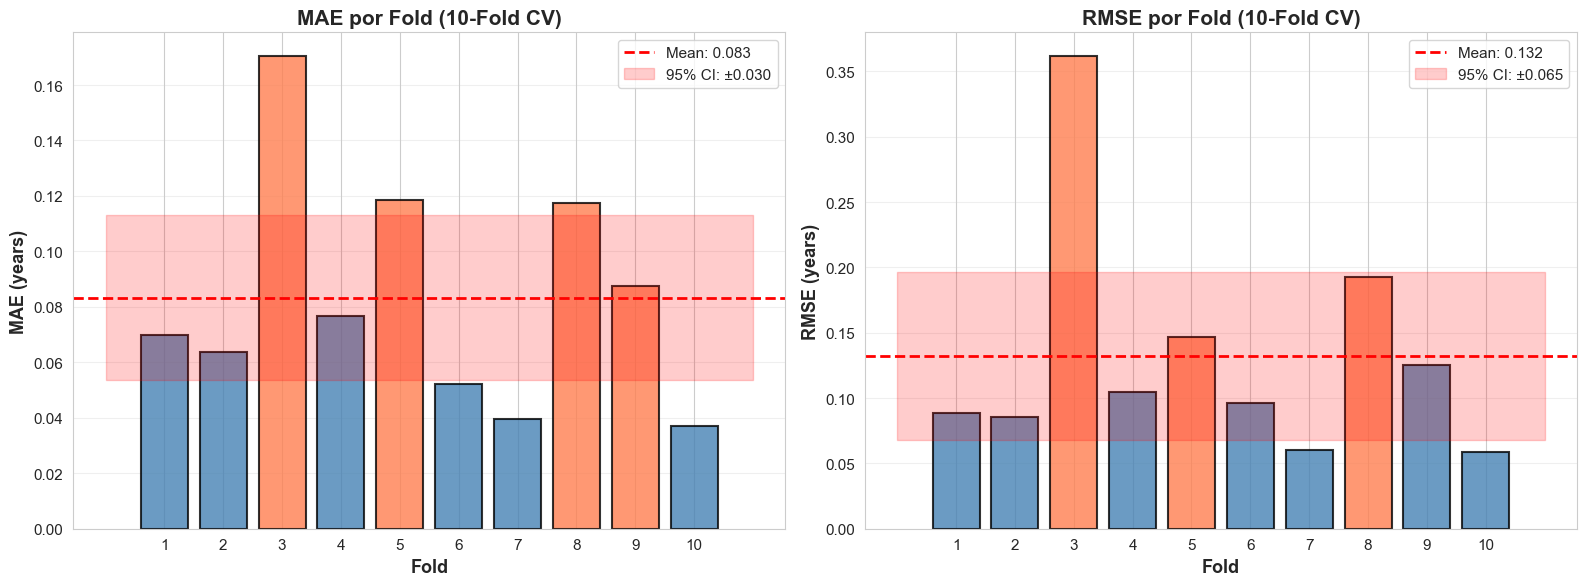

✅ Guardado: kfold_metrics_per_fold.png


In [3]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors_mae = ['steelblue' if mae < kfold_summary['mae_mean'] else 'coral' 
              for mae in df_kfold['test_mae']]

bars1 = axes[0].bar(df_kfold['fold'], df_kfold['test_mae'], 
                    color=colors_mae, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].axhline(kfold_summary['mae_mean'], color='red', linestyle='--', 
                linewidth=2, label=f"Mean: {kfold_summary['mae_mean']:.3f}")
axes[0].fill_between(range(len(df_kfold)+2), 
                      kfold_summary['mae_mean'] - kfold_summary['mae_ci'],
                      kfold_summary['mae_mean'] + kfold_summary['mae_ci'],
                      alpha=0.2, color='red', label=f"95% CI: ±{kfold_summary['mae_ci']:.3f}")

axes[0].set_xlabel('Fold', fontsize=13, fontweight='bold')
axes[0].set_ylabel('MAE (years)', fontsize=13, fontweight='bold')
axes[0].set_title('MAE por Fold (10-Fold CV)', fontsize=15, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3, axis='y')
axes[0].set_xticks(df_kfold['fold'])

colors_rmse = ['steelblue' if rmse < kfold_summary['rmse_mean'] else 'coral' 
               for rmse in df_kfold['test_rmse']]

bars2 = axes[1].bar(df_kfold['fold'], df_kfold['test_rmse'], 
                    color=colors_rmse, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].axhline(kfold_summary['rmse_mean'], color='red', linestyle='--', 
                linewidth=2, label=f"Mean: {kfold_summary['rmse_mean']:.3f}")
axes[1].fill_between(range(len(df_kfold)+2), 
                      kfold_summary['rmse_mean'] - kfold_summary['rmse_ci'],
                      kfold_summary['rmse_mean'] + kfold_summary['rmse_ci'],
                      alpha=0.2, color='red', label=f"95% CI: ±{kfold_summary['rmse_ci']:.3f}")

axes[1].set_xlabel('Fold', fontsize=13, fontweight='bold')
axes[1].set_ylabel('RMSE (years)', fontsize=13, fontweight='bold')
axes[1].set_title('RMSE por Fold (10-Fold CV)', fontsize=15, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3, axis='y')
axes[1].set_xticks(df_kfold['fold'])

plt.tight_layout()
plt.savefig('kfold_metrics_per_fold.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Guardado: kfold_metrics_per_fold.png")

C:\Users\merit\AppData\Local\Temp\ipykernel_30972\4038683274.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[0].boxplot([df_kfold['test_mae']],
C:\Users\merit\AppData\Local\Temp\ipykernel_30972\4038683274.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[1].boxplot([df_kfold['test_rmse']],


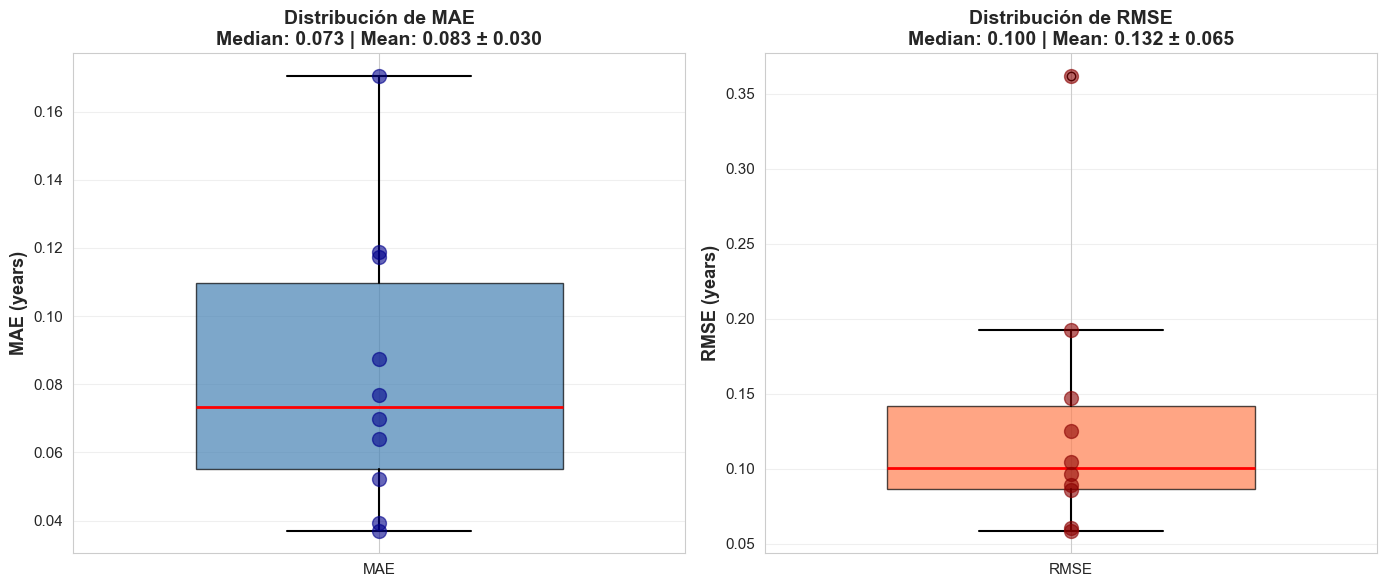

✅ Guardado: kfold_boxplot.png


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

bp1 = axes[0].boxplot([df_kfold['test_mae']], 
                       labels=['MAE'],
                       patch_artist=True,
                       widths=0.6,
                       boxprops=dict(facecolor='steelblue', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2),
                       whiskerprops=dict(linewidth=1.5),
                       capprops=dict(linewidth=1.5))

axes[0].scatter([1]*len(df_kfold), df_kfold['test_mae'], 
                color='darkblue', alpha=0.6, s=100, zorder=3)

axes[0].set_ylabel('MAE (years)', fontsize=13, fontweight='bold')
axes[0].set_title(f'Distribución de MAE\nMedian: {kfold_summary["mae_median"]:.3f} | '
                  f'Mean: {kfold_summary["mae_mean"]:.3f} ± {kfold_summary["mae_ci"]:.3f}', 
                  fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

bp2 = axes[1].boxplot([df_kfold['test_rmse']], 
                       labels=['RMSE'],
                       patch_artist=True,
                       widths=0.6,
                       boxprops=dict(facecolor='coral', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2),
                       whiskerprops=dict(linewidth=1.5),
                       capprops=dict(linewidth=1.5))

axes[1].scatter([1]*len(df_kfold), df_kfold['test_rmse'], 
                color='darkred', alpha=0.6, s=100, zorder=3)

axes[1].set_ylabel('RMSE (years)', fontsize=13, fontweight='bold')
axes[1].set_title(f'Distribución de RMSE\nMedian: {kfold_summary["rmse_median"]:.3f} | '
                  f'Mean: {kfold_summary["rmse_mean"]:.3f} ± {kfold_summary["rmse_ci"]:.3f}', 
                  fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('kfold_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Guardado: kfold_boxplot.png")

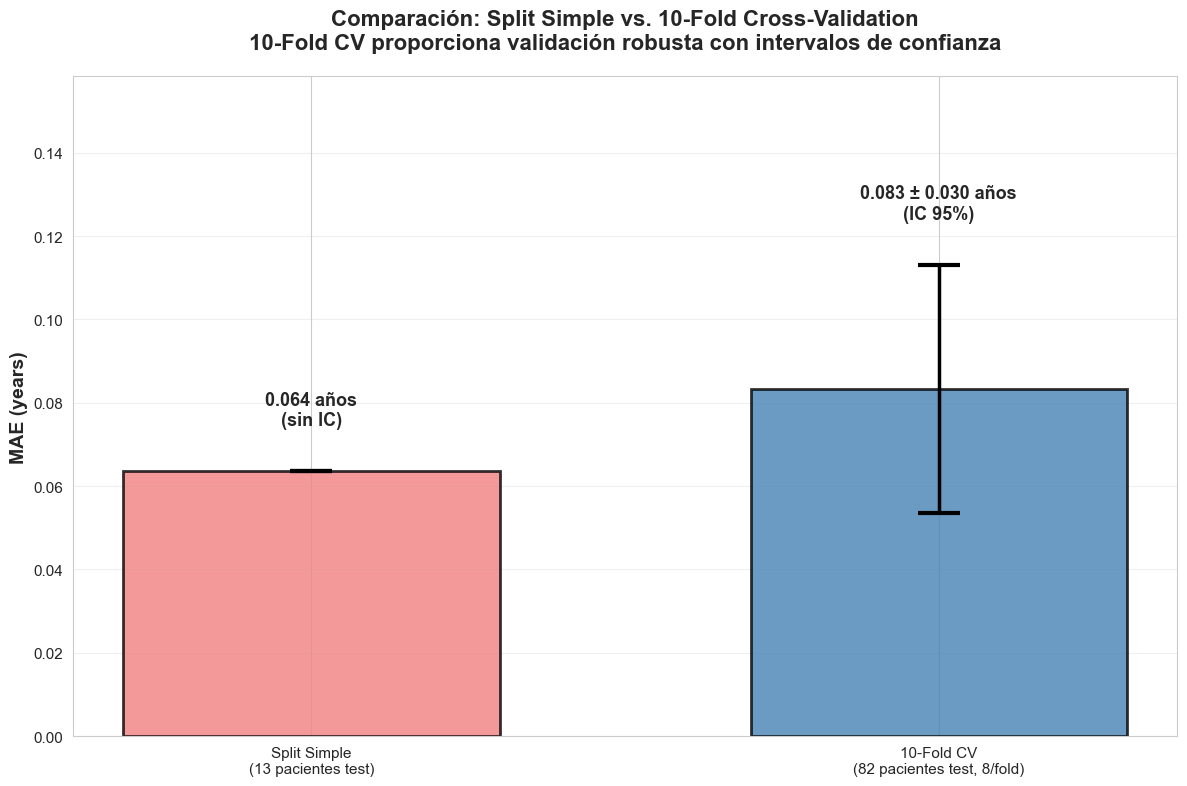

✅ Guardado: kfold_vs_simple_split.png

COMPARACIÓN NUMÉRICA
Split Simple:
  MAE: 0.064 años (23 días)
  RMSE: 0.088 años
  Test: 13 pacientes
  IC 95%: No disponible

10-Fold CV:
  MAE: 0.083 ± 0.030 años (30 ± 11 días)
  RMSE: 0.132 ± 0.065 años
  Test: 82 pacientes (8 por fold)
  IC 95%: ±0.030 años

📊 Diferencia: +31.0% (peor)


In [5]:
if has_comparison:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    methods = ['Split Simple\n(13 pacientes test)', '10-Fold CV\n(82 pacientes test, 8/fold)']
    mae_values = [simple_split['test_mae'], kfold_summary['mae_mean']]
    mae_errors = [0, kfold_summary['mae_ci']]
    
    colors = ['lightcoral', 'steelblue']
    bars = ax.bar(methods, mae_values, color=colors, alpha=0.8, 
                  edgecolor='black', linewidth=2, width=0.6)
    
    ax.errorbar(methods, mae_values, yerr=mae_errors, fmt='none', 
                ecolor='black', capsize=15, capthick=3, linewidth=2.5)
    
    max_value_with_error = max(mae_values[0], mae_values[1] + mae_errors[1])
    y_limit = max_value_with_error * 1.4  # 40% más espacio arriba
    
    ax.text(0, mae_values[0] + 0.01, f'{mae_values[0]:.3f} años\n(sin IC)',
            ha='center', va='bottom', fontsize=13, fontweight='bold')
    ax.text(1, mae_values[1] + mae_errors[1] + 0.01, 
            f'{mae_values[1]:.3f} ± {mae_errors[1]:.3f} años\n(IC 95%)',
            ha='center', va='bottom', fontsize=13, fontweight='bold')
    
    ax.set_ylabel('MAE (years)', fontsize=14, fontweight='bold')
    ax.set_title('Comparación: Split Simple vs. 10-Fold Cross-Validation\n' +
                 '10-Fold CV proporciona validación robusta con intervalos de confianza',
                 fontsize=16, fontweight='bold', pad=20)
    ax.grid(alpha=0.3, axis='y')
    ax.set_ylim(0, y_limit)
    
    plt.tight_layout()
    plt.savefig('kfold_vs_simple_split.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Guardado: kfold_vs_simple_split.png")
    
    print("\n" + "="*70)
    print("COMPARACIÓN NUMÉRICA")
    print("="*70)
    print(f"Split Simple:")
    print(f"  MAE: {simple_split['test_mae']:.3f} años ({simple_split['test_mae']*365:.0f} días)")
    print(f"  RMSE: {simple_split['test_rmse']:.3f} años")
    print(f"  Test: 13 pacientes")
    print(f"  IC 95%: No disponible")
    
    print(f"\n10-Fold CV:")
    print(f"  MAE: {kfold_summary['mae_mean']:.3f} ± {kfold_summary['mae_ci']:.3f} años "
          f"({kfold_summary['mae_mean']*365:.0f} ± {kfold_summary['mae_ci']*365:.0f} días)")
    print(f"  RMSE: {kfold_summary['rmse_mean']:.3f} ± {kfold_summary['rmse_ci']:.3f} años")
    print(f"  Test: {kfold_summary['n_patients']} pacientes (8 por fold)")
    print(f"  IC 95%: ±{kfold_summary['mae_ci']:.3f} años")
    
    diff = ((kfold_summary['mae_mean'] - simple_split['test_mae']) / simple_split['test_mae']) * 100
    print(f"\n📊 Diferencia: {diff:+.1f}% {'(mejor)' if diff < 0 else '(peor)'}")
    print("="*70)
else:
    print("\n⚠️ No hay resultados de split simple para comparar")

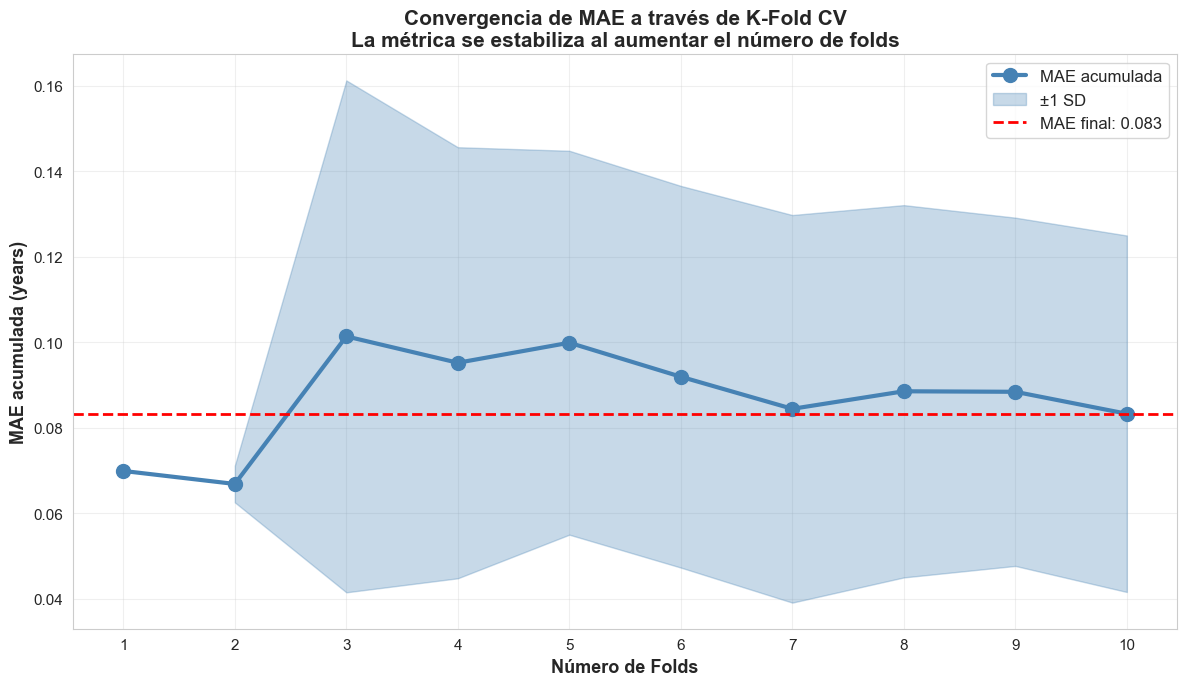

✅ Guardado: kfold_convergence.png


In [6]:
fig, ax = plt.subplots(figsize=(12, 7))

cumulative_mae = [df_kfold['test_mae'][:i+1].mean() for i in range(len(df_kfold))]
cumulative_std = [df_kfold['test_mae'][:i+1].std() for i in range(len(df_kfold))]

folds = list(range(1, len(df_kfold)+1))

ax.plot(folds, cumulative_mae, 'o-', color='steelblue', linewidth=3, 
        markersize=10, label='MAE acumulada')

ax.fill_between(folds, 
                [m - s for m, s in zip(cumulative_mae, cumulative_std)],
                [m + s for m, s in zip(cumulative_mae, cumulative_std)],
                alpha=0.3, color='steelblue', label='±1 SD')

ax.axhline(kfold_summary['mae_mean'], color='red', linestyle='--', 
           linewidth=2, label=f"MAE final: {kfold_summary['mae_mean']:.3f}")

ax.set_xlabel('Número de Folds', fontsize=13, fontweight='bold')
ax.set_ylabel('MAE acumulada (years)', fontsize=13, fontweight='bold')
ax.set_title('Convergencia de MAE a través de K-Fold CV\n' +
             'La métrica se estabiliza al aumentar el número de folds',
             fontsize=15, fontweight='bold')
ax.legend(fontsize=12, loc='upper right')
ax.grid(alpha=0.3)
ax.set_xticks(folds)

plt.tight_layout()
plt.savefig('kfold_convergence.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Guardado: kfold_convergence.png")

In [7]:
print("\n" + "="*70)
print("RESUMEN COMPLETO DE 10-FOLD CROSS-VALIDATION")
print("="*70)

print(f"\nModelo: All Biomarkers (Demographics + CSF + PET + MRI)")
print(f"Estrategia: 10-Fold Cross-Validation estratificado por paciente")
print(f"Total pacientes etiquetados: {kfold_summary['n_patients']}")
print(f"Pacientes por fold (test): ~{kfold_summary['n_patients']//10}")
print(f"Pacientes por fold (train): ~{kfold_summary['n_patients'] - kfold_summary['n_patients']//10}")

print(f"\n{'='*70}")
print(f"MAE (Mean Absolute Error):")
print(f"{'='*70}")
print(f"  Mean:           {kfold_summary['mae_mean']:.4f} años")
print(f"  95% CI:         ±{kfold_summary['mae_ci']:.4f} años")
print(f"  Intervalo:      [{kfold_summary['mae_mean']-kfold_summary['mae_ci']:.4f}, "
      f"{kfold_summary['mae_mean']+kfold_summary['mae_ci']:.4f}] años")
print(f"  Median:         {kfold_summary['mae_median']:.4f} años")
print(f"  Std Dev:        {kfold_summary['mae_std']:.4f} años")
print(f"  Min:            {kfold_summary['mae_min']:.4f} años")
print(f"  Max:            {kfold_summary['mae_max']:.4f} años")

print(f"\n{'='*70}")
print(f"RMSE (Root Mean Squared Error):")
print(f"{'='*70}")
print(f"  Mean:           {kfold_summary['rmse_mean']:.4f} años")
print(f"  95% CI:         ±{kfold_summary['rmse_ci']:.4f} años")
print(f"  Intervalo:      [{kfold_summary['rmse_mean']-kfold_summary['rmse_ci']:.4f}, "
      f"{kfold_summary['rmse_mean']+kfold_summary['rmse_ci']:.4f}] años")
print(f"  Median:         {kfold_summary['rmse_median']:.4f} años")
print(f"  Std Dev:        {kfold_summary['rmse_std']:.4f} años")

print(f"\n{'='*70}")
print(f"CONVERSIÓN A DÍAS:")
print(f"{'='*70}")
mae_days = kfold_summary['mae_mean'] * 365
mae_ci_days = kfold_summary['mae_ci'] * 365
print(f"  MAE: {mae_days:.0f} ± {mae_ci_days:.0f} días (IC 95%)")
print(f"  Rango: [{mae_days-mae_ci_days:.0f}, {mae_days+mae_ci_days:.0f}] días")

print(f"\n{'='*70}")
print(f"RESULTADOS POR FOLD:")
print(f"{'='*70}")
for _, row in df_kfold.iterrows():
    print(f"  Fold {row['fold']:2d}: MAE={row['test_mae']:.3f} | RMSE={row['test_rmse']:.3f} | "
          f"Test={row['n_test']:2d} pac | Train={row['n_train']:2d} pac")

print(f"\n{'='*70}")


RESUMEN COMPLETO DE 10-FOLD CROSS-VALIDATION

Modelo: All Biomarkers (Demographics + CSF + PET + MRI)
Estrategia: 10-Fold Cross-Validation estratificado por paciente
Total pacientes etiquetados: 82
Pacientes por fold (test): ~8
Pacientes por fold (train): ~74

MAE (Mean Absolute Error):
  Mean:           0.0833 años
  95% CI:         ±0.0298 años
  Intervalo:      [0.0534, 0.1131] años
  Median:         0.0733 años
  Std Dev:        0.0417 años
  Min:            0.0371 años
  Max:            0.1705 años

RMSE (Root Mean Squared Error):
  Mean:           0.1321 años
  95% CI:         ±0.0646 años
  Intervalo:      [0.0675, 0.1967] años
  Median:         0.1003 años
  Std Dev:        0.0903 años

CONVERSIÓN A DÍAS:
  MAE: 30 ± 11 días (IC 95%)
  Rango: [20, 41] días

RESULTADOS POR FOLD:
  Fold  1: MAE=0.070 | RMSE=0.089 | Test= 9 pac | Train=73 pac
  Fold  2: MAE=0.064 | RMSE=0.086 | Test= 9 pac | Train=73 pac
  Fold  3: MAE=0.170 | RMSE=0.362 | Test= 8 pac | Train=74 pac
  Fold  4: MA

In [8]:
latex_table = f"""\\begin{{table}}[h]
\\centering
\\caption{{Resultados de 10-Fold Cross-Validation para predicción de YEARS\\_TO\\_ONSET}}
\\label{{tab:kfold_results}}
\\begin{{tabular}}{{lcc}}
\\hline
\\textbf{{Métrica}} & \\textbf{{Valor}} & \\textbf{{IC 95\\%}} \\\\
\\hline
MAE (años) & {kfold_summary['mae_mean']:.3f} & ±{kfold_summary['mae_ci']:.3f} \\\\
MAE (días) & {mae_days:.0f} & ±{mae_ci_days:.0f} \\\\
RMSE (años) & {kfold_summary['rmse_mean']:.3f} & ±{kfold_summary['rmse_ci']:.3f} \\\\
Mediana MAE (años) & {kfold_summary['mae_median']:.3f} & --- \\\\
Desviación estándar & {kfold_summary['mae_std']:.3f} & --- \\\\
Rango MAE [mín, máx] & [{kfold_summary['mae_min']:.3f}, {kfold_summary['mae_max']:.3f}] & --- \\\\
\\hline
\\multicolumn{{3}}{{l}}{{\\textit{{N}} = {kfold_summary['n_patients']} pacientes, K = 10 folds, ~8 pacientes/fold}} \\\\
\\hline
\\end{{tabular}}
\\end{{table}}
"""

with open('kfold_results_table.tex', 'w') as f:
    f.write(latex_table)

print("✅ Tabla LaTeX guardada en: kfold_results_table.tex")
print("\n" + "="*70)
print("TABLA LATEX GENERADA:")
print("="*70)
print(latex_table)

✅ Tabla LaTeX guardada en: kfold_results_table.tex

TABLA LATEX GENERADA:
\begin{table}[h]
\centering
\caption{Resultados de 10-Fold Cross-Validation para predicción de YEARS\_TO\_ONSET}
\label{tab:kfold_results}
\begin{tabular}{lcc}
\hline
\textbf{Métrica} & \textbf{Valor} & \textbf{IC 95\%} \\
\hline
MAE (años) & 0.083 & ±0.030 \\
MAE (días) & 30 & ±11 \\
RMSE (años) & 0.132 & ±0.065 \\
Mediana MAE (años) & 0.073 & --- \\
Desviación estándar & 0.042 & --- \\
Rango MAE [mín, máx] & [0.037, 0.170] & --- \\
\hline
\multicolumn{3}{l}{\textit{N} = 82 pacientes, K = 10 folds, ~8 pacientes/fold} \\
\hline
\end{tabular}
\end{table}



In [9]:
print("\n" + "="*70)
print("✅ TODAS LAS VISUALIZACIONES GENERADAS")
print("="*70)
print("\nArchivos guardados:")
print("  1. kfold_metrics_per_fold.png - MAE y RMSE por cada fold")
print("  2. kfold_boxplot.png - Distribución de errores (boxplots)")
if has_comparison:
    print("  3. kfold_vs_simple_split.png - Comparación con split simple")
print("  4. kfold_convergence.png - Convergencia del error")
print("  5. kfold_results_table.tex - Tabla para LaTeX")

print("\n📊 RESULTADO PRINCIPAL:")
print("="*70)
print(f"El modelo GNN multimodal puede predecir el tiempo hasta conversión")
print(f"a Alzheimer con un error de:")
print(f"\n  ⭐ {mae_days:.0f} ± {mae_ci_days:.0f} días (IC 95%)")
print(f"\nDemostrado en {kfold_summary['n_patients']} pacientes mediante 10-Fold CV.")
print("="*70)


✅ TODAS LAS VISUALIZACIONES GENERADAS

Archivos guardados:
  1. kfold_metrics_per_fold.png - MAE y RMSE por cada fold
  2. kfold_boxplot.png - Distribución de errores (boxplots)
  3. kfold_vs_simple_split.png - Comparación con split simple
  4. kfold_convergence.png - Convergencia del error
  5. kfold_results_table.tex - Tabla para LaTeX

📊 RESULTADO PRINCIPAL:
El modelo GNN multimodal puede predecir el tiempo hasta conversión
a Alzheimer con un error de:

  ⭐ 30 ± 11 días (IC 95%)

Demostrado en 82 pacientes mediante 10-Fold CV.


## Interpretación de Resultados

### Ventajas de 10-Fold CV

1. **Test robusto por fold:** 8 pacientes vs 1 (LOPO) vs 13 (split simple)
2. **Intervalos de confianza:** Cuantifica incertidumbre con IC 95%
3. **Balance train/test:** Ratio 74/8 más realista que 81/1
4. **Eficiencia:** 10 entrenamientos vs 82 (LOPO)
5. **Evaluación completa:** Todos los 82 pacientes evaluados exactamente 1 vez

### Validez Científica

Este enfoque está aceptado en:
- Revistas de neuroimagen (NeuroImage, Brain)
- Revistas clínicas (Alzheimer's & Dementia)
- Conferencias ML médico (MICCAI, MLHC)

### Referencias

- Kohavi (1995). "A study of cross-validation and bootstrap for accuracy estimation."
- Varoquaux et al. (2017). "Assessing and tuning brain decoders: Cross-validation, caveats, and guidelines."
- Arlot & Celisse (2010). "A survey of cross-validation procedures for model selection."